### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [15]:
import pandas as pd
print(pd.__version__)

2.2.2


In [19]:
data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
# 행과 열 확인
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(229, 8)


In [21]:
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [17]:
data.tail(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [25]:
data.sample()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
21,21,327111,광명,3,3,38.5,경기도,광명시


In [29]:
print(f'컬럼명 = {data.columns}')
print(f'인덱스 = {data.index}')

컬럼명 = Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
인덱스 = RangeIndex(start=0, stop=229, step=1)


In [33]:
#DataFrame의 values
print(type(data.values))
data.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']], dtype=object)

In [37]:
#DataFrame information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [41]:
# 컬럼의 Data Type 확인
data.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [47]:
# 특정 컬럼 (인구수)의 Data Type 확인
print(type(data))
print(type(data['인구수']))
data['인구수'].dtypes

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


dtype('int64')

In [75]:
# 숫자 데이터에 대한 집계함수
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [55]:
import numpy as np
data.describe(include=[np.number])

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [79]:
# 문자 데이터에 대한 집계 함수
data.describe(include=[object])

,shortName,광역시도,행정구역
count,229,229,229
unique,229,17,206
top,강릉,경기도,동구
freq,1,31,6


In [81]:
# 모든 컬럼의 데이터에 대한 집계함수
data.describe(include='all')

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
count,229.000000,2.290000e+02,229,229.000000,229.000000,229.000000,229,229
unique,NaN,NaN,229,NaN,NaN,NaN,17,206
top,NaN,NaN,강릉,NaN,NaN,NaN,경기도,동구
freq,NaN,NaN,1,NaN,NaN,NaN,31,6
mean,114.000000,2.110898e+05,NaN,6.117904,11.262009,435.419795,NaN,NaN
std,66.250786,2.074378e+05,NaN,3.320469,6.040898,381.612549,NaN,NaN
min,0.000000,8.392000e+03,NaN,0.000000,0.000000,2.800000,NaN,NaN
25%,57.000000,4.955900e+04,NaN,3.000000,6.000000,54.000000,NaN,NaN
50%,114.000000,1.401590e+05,NaN,6.000000,11.000000,436.400000,NaN,NaN
75%,171.000000,3.216180e+05,NaN,9.000000,16.000000,692.800000,NaN,NaN


In [71]:
# 행정구역 컬럼 데이터 출력
#data['행정구역'] == '동구'
# 조건식과 매핑되는 Row data 선택
# data.loc[row, col]
data.loc[data['행정구역'] == '동구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
92,92,97571,광주동구,3,20,48.86,광주광역시,동구
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
112,112,85952,부산동구,10,17,9.77,부산광역시,동구
151,151,164738,울산동구,12,14,35.77,울산광역시,동구
159,159,68950,인천동구,1,5,7.05,인천광역시,동구


In [87]:
# 특정 컬럼의 unique한 값 출력하기
print(len(data['광역시도'].unique()))
data['광역시도'].unique()

17


array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [107]:
# 경기도에 속한 행정구역 출력하기출력하기
data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,수원시,1125461,121.090
1,고양시,955384,267.330
2,용인시,915005,591.500
3,성남시,911628,141.820
4,부천시,805473,53.440
5,안산시,668089,144.780
6,남양주시,610300,458.440
7,안양시,566558,58.520
8,화성시,555129,688.100
9,평택시,423763,452.310


### Data Selection
* loc[row, col]
    - row : 조건식, index
    - col : 컬럼명
* iloc[row, col]
    - row : index
    - col: 컬럼index

In [114]:
# 인구수 1개 컬럼 선택
print(type(data['인구수']))
data['인구수']

<class 'pandas.core.series.Series'>


0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [127]:
# 인구수 컬럼의 집계 함수
popSeries = data['인구수']
print(f'인구수 최대값 {popSeries.max():,}')
print(f'인구수 최소값 {popSeries.min():,}')
print(f'인구수 평균 {round(popSeries.mean()):,}')
print(f'인구수 표준편차 {round(popSeries.std()):,}')
print(f'인구수 중간값 {round(popSeries.median()):,}')
print(f'인구수 25% 75% {popSeries.quantile([0.25, 0.75])}')

인구수 최대값 1,125,461
인구수 최소값 8,392
인구수 평균 211,090
인구수 표준편차 207,438
인구수 중간값 140,159
인구수 25% 75% 0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64


In [131]:
# 인구 수가 가장 많은 행정 구역은?
pop_max_val = data['인구수'].max()
data.loc[data['인구수'] == pop_max_val]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [135]:
# 인구 수가 가장 적은 행정 구역은?
pop_min_val = data['인구수'].min()
data.loc[data['인구수'] == pop_min_val]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
83,83,8392,울릉,13,6,72.82,경상북도,울릉군


In [151]:
# 평균 인구수 보다 작은 행정 구역은?
# 출력항목 : 광역시도, 행정구역, 인구수
# index는 reset, Sorting은 인구가 많은 순서대로
pop_mean_val = data['인구수'].mean()
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_val, ['광역시도','행정구역','인구수']].sort_values(by='인구수', ascending=False).reset_index(drop=True)
pop_mean_lt_df.tail(3)
pop_mean_lt_df.to_excel('data/평균인구수미만지역.xlsx')

In [154]:
# 광역 시도 별 Row Counting
data['광역시도'].value_counts()

광역시도
경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [162]:
# 경기도에 속한 행정구역 출력하기
gy_df = data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False)\
.reset_index(drop=True)
# 새로운 컬럼 생성(인구수2, 면적2, 생성하기
gy_df['인구수2'] = gy_df['인구수'].map('{:,}'.format)
gy_df['면적2'] = gy_df['면적'].map('{:.2f}'.format)
gy_df.head(2)

,행정구역,인구수,면적,인구수2,면적2
0,수원시,1125461,121.09,"1,125,461",121.09
1,고양시,955384,267.33,"955,384",267.33


In [167]:
# 경기도 인구수의 평균과 표준편차 구하기
print(f'경기도 인구수 평균 {round(gy_df['인구수'].mean()):,}')
print(f'경기도 인구수 표준편차 {round(gy_df['인구수'].std()):,}')

경기도 인구수 평균 378,845
경기도 인구수 표준편차 304,548


In [199]:
# 광역시도명 인자로 받아서 해당 광역시의 인구수의 평균과 편차 구하기
import numpy as np 

def pop_mean_std_print(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name, ['행정구역','인구수']]
    print(f'{sido_name} 인구수 평균 {round(sido_df['인구수'].mean()):,}')
    if np.isnan(sido_df['인구수'].std()):
        print(f'{sido_name} 인구수 표준편차 {0}')
    else:    
        print(f'{sido_name} 인구수 표준편차 {round(sido_df['인구수'].std()):,}')

In [201]:
pop_mean_std_print('서울특별시')

서울특별시 인구수 평균 375,792
서울특별시 인구수 표준편차 125,231


In [211]:
for sido_name in data['광역시도'].unique():
    pop_mean_std_print(sido_name)

강원도 인구수 평균 79,413
강원도 인구수 표준편차 87,316
경기도 인구수 평균 378,845
경기도 인구수 표준편차 304,548
경상남도 인구수 평균 174,694
경상남도 인구수 표준편차 245,796
경상북도 인구수 평균 109,085
경상북도 인구수 표준편차 124,955
광주광역시 인구수 평균 287,642
광주광역시 인구수 표준편차 137,077
대구광역시 인구수 평균 297,306
대구광역시 인구수 표준편차 174,375
대전광역시 인구수 평균 293,535
대전광역시 인구수 표준편차 111,854
부산광역시 인구수 평균 207,724
부산광역시 인구수 표준편차 106,246
서울특별시 인구수 평균 375,792
서울특별시 인구수 표준편차 125,231
세종특별자치시 인구수 평균 191,233
세종특별자치시 인구수 표준편차 0
울산광역시 인구수 평균 221,117
울산광역시 인구수 표준편차 64,163
인천광역시 인구수 평균 276,658
인천광역시 인구수 표준편차 199,354
전라남도 인구수 평균 77,298
전라남도 인구수 표준편차 74,413
전라북도 인구수 평균 124,218
전라북도 인구수 표준편차 168,327
제주특별자치도 인구수 평균 287,936
제주특별자치도 인구수 표준편차 201,621
충청남도 인구수 평균 129,742
충청남도 인구수 표준편차 141,125
충청북도 인구수 평균 134,975
충청북도 인구수 표준편차 223,460


In [215]:
# loc[20:25] index가 20~25
data.loc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [219]:
# iloc[20:25] index가 20 ~ 24
data.iloc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [223]:
# loc[20:23,'인구수':'행정구역'] index가 20 ~ 23, 컬럼이 인구수 ~ 행정구역 
data.loc[20:23,'인구수':'행정구역']

,인구수,shortName,x,y,면적,광역시도,행정구역
20,63227,과천,7,7,35.813,경기도,과천시
21,327111,광명,3,3,38.500,경기도,광명시
22,290210,광주,8,7,431.840,경기도,광주시
23,175676,구리,9,4,33.300,경기도,구리시


In [227]:
# iloc[20:23,1:8] index가 20 ~ 23, 컬럼인덱스 1 ~ 8
data.iloc[20:23,1:8]

,인구수,shortName,x,y,면적,광역시도,행정구역
20,63227,과천,7,7,35.813,경기도,과천시
21,327111,광명,3,3,38.500,경기도,광명시
22,290210,광주,8,7,431.840,경기도,광주시


In [276]:
# loc[[1,3,6,7],['인구수','행정구역']] 특정 index와 컬럼을 선택
data.loc[[1,3,6,7],['인구수','행정구역']]

,인구수,행정구역
seq,,
1,25589,고성군
3,63986,삼척시
6,24551,양양군
7,34966,영월군


In [278]:
# 인덱스 0인 행 하나만 선택
print(type(data.loc[0]))
data.loc[0]   

<class 'pandas.core.series.Series'>


인구수           202520
shortName         강릉
x                 11
y                  4
면적           1040.07
광역시도             강원도
행정구역             강릉시
Name: 0, dtype: object

### 컬럼명 변경하기, 컬럼을 인덱스로 전환하기
* rename() 함수
  - inplace=False(default) 원본 DataFrame 객체를 변경하지 않고, 변경한 결과만 출력한다.
  - inplace=True 원본 DataFrame 객체를 변경하고, 결과는 출력하지 않는다.

In [281]:
data.columns

Index(['인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [283]:
data.rename(columns={'Unnamed: 0':'seq'}, inplace=True)

In [285]:
data.head(2)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


In [ ]:
# seq 컬럼을 인덱스로 변경하기
data.set_index('seq', inplace=True)

In [289]:
data.head(2)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달합니다.
* Series 객체 series.groupby(data['광역시도']) 함수는 컬럼값을 전달합니다.
* DataFrame 객체 dataframe.groupby('광역시도') 함수는 컬럼명을 전달합니다.

In [298]:
# Series 객체 사용 - 광역시도별 행정구역의 인구수 합계
# pandas.core.groupby.generic.SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [309]:
# DataFrame 객체 사용 - 광역시도별 행정구역의 인구수 합계
# pandas.core.groupby.generic.DataFrameGroupBy object
data.groupby('광역시도').sum(numeric_only=True)

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [315]:
data.groupby('광역시도')['인구수'].sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [354]:
# 광역시도별, 행정구역별 인구수의 합계
group_series = data.groupby(['광역시도','행정구역'])['인구수'].sum()
group_series.to_excel('data/광역시별행정구역별인구수합계.xlsx',sheet_name='인구수')

In [356]:
type(group_series)

pandas.core.series.Series

### Excel 수치 데이터에 콤마 찍기
* [ExcelWriter](https://xlsxwriter.readthedocs.io/working_with_pandas.html)

In [340]:
!pip show xlsxwriter

Name: XlsxWriter
Version: 3.2.0
Summary: A Python module for creating Excel XLSX files.
Home-page: https://github.com/jmcnamara/XlsxWriter
Author: John McNamara
Author-email: jmcnamara@cpan.org
License: BSD-2-Clause
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: 
Required-by: 


In [342]:
!pip install xlsxwriter

In [358]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
group_series.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save()

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [360]:
# 모든 행정구역의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

-0.346035160504577

In [23]:
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['면적'].corr(seoul_df['인구수'])

0.6644268188909778

In [378]:
gy_df = data.loc[data['광역시도'] == '경기도']
gy_df['면적'].corr(gy_df['인구수'])

-0.21572485071590813

### Grouping 된 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','std'])

In [388]:
data.groupby('광역시도')['인구수'].agg(['max','mean','std','min']).fillna(0)

,max,mean,std,min
광역시도,,,,
강원도,313851,79413.222222,87316.383238,20809
경기도,1125461,378845.483871,304548.395142,41076
경상남도,1010040,174693.722222,245796.465077,25091
경상북도,488395,109085.391304,124954.740885,8392
광주광역시,439683,287641.800000,137076.683206,97571
대구광역시,584517,297306.250000,174375.394380,74950
대전광역시,475094,293535.400000,111853.571882,190815
부산광역시,397134,207724.437500,106246.041384,43105
서울특별시,615487,375792.280000,125231.247975,114967


In [404]:

# std(편차) 높은 순서대로 정렬
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std','min']).fillna(0).sort_values(by='std',ascending=False)
group_agg_df

,max,mean,std,min
광역시도,,,,
경기도,1125461,378845.483871,304548.395142,41076
경상남도,1010040,174693.722222,245796.465077,25091
충청북도,790216,134974.545455,223460.356657,27130
제주특별자치도,430504,287936.500000,201620.892054,145369
인천광역시,527153,276657.500000,199353.596491,17735
대구광역시,584517,297306.250000,174375.394380,74950
전라북도,630708,124217.714286,168327.134821,20492
충청남도,584912,129741.933333,141125.108080,29671
광주광역시,439683,287641.800000,137076.683206,97571


In [406]:
# mean, std 컬럼의 값을 소수점이하 둘째짜리 로 변경하기
group_agg_df['mean'] = group_agg_df['mean'].map('{:.2f}'.format)
group_agg_df['std'] = group_agg_df['std'].map('{:.2f}'.format)

In [408]:
group_agg_df

,max,mean,std,min
광역시도,,,,
경기도,1125461,378845.48,304548.40,41076
경상남도,1010040,174693.72,245796.47,25091
충청북도,790216,134974.55,223460.36,27130
제주특별자치도,430504,287936.50,201620.89,145369
인천광역시,527153,276657.50,199353.60,17735
대구광역시,584517,297306.25,174375.39,74950
전라북도,630708,124217.71,168327.13,20492
충청남도,584912,129741.93,141125.11,29671
광주광역시,439683,287641.80,137076.68,97571


#### 시각화
* %matplotlib inline 설정 (jupyter 에서는 show() 함수를 호출하지 않아도 plot이 출력된다)
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [7]:
%matplotlib inline

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn', sns.__version__)

matplotlib  3.8.4
seaborn 0.13.2


In [421]:
# for font in fm.fontManager.ttflist:
#     print((font.name, font.fname))
# 폰트이름과 폰트파일 정보 출력 list comprehension 
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

[('Sama Malayalam',
  '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/25f6134c89b011288b72c7b81c9c22b2d6882471.asset/AssetData/SamaMalayalam.ttc'),
 ('Malayalam MN', '/System/Library/Fonts/Supplemental/Malayalam MN.ttc'),
 ('Mali',
  '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/9d609221be9203a6d0e55f5117ff76246f4200a7.asset/AssetData/Mali.ttc'),
 ('Malayalam Sangam MN',
  '/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc'),
 ('Mukta Malar',
  '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/7cc6c684c40b997bfac55b2647ca929ca521792d.asset/AssetData/MuktaMalar-Tamil.ttc')]

In [427]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/25f6134c89b011288b72c7b81c9c22b2d6882471.asset/AssetData/SamaMalayalam.ttc'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

Sama Malayalam


In [35]:
# 한글 폰트 명을 matplotlib에 설정하기
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


In [25]:
seoul_df.head(3)


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
124,124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,126,310292,서울강북,5,2,23.6,서울특별시,강북구


Figure(1800x1200)


<Axes: xlabel='행정구역', ylabel='면적'>

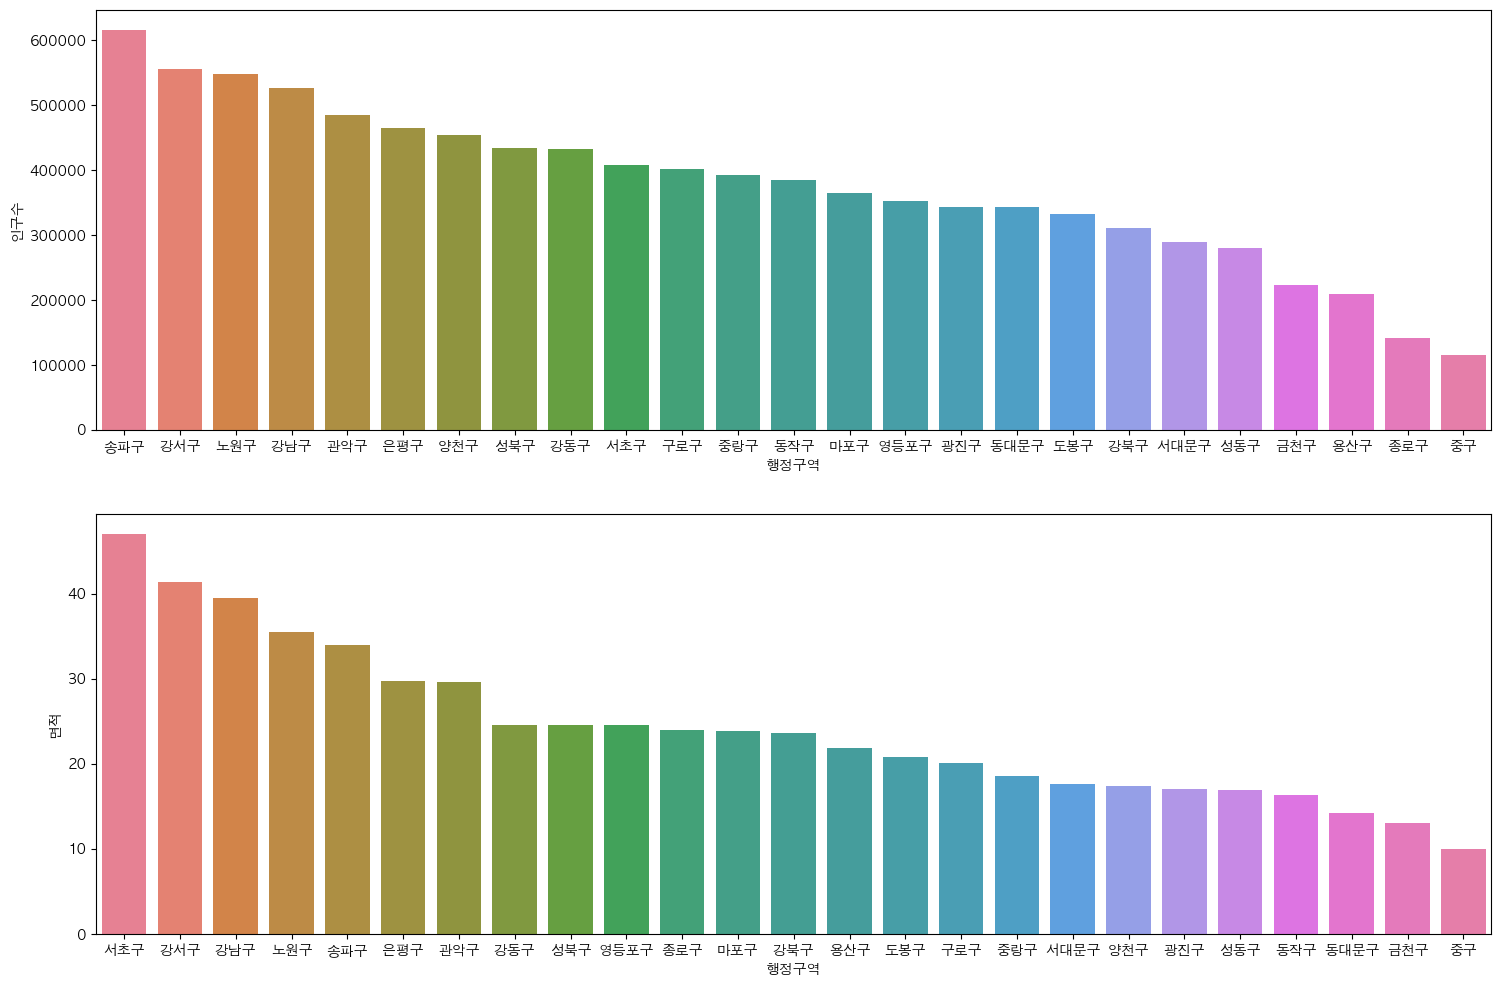

In [43]:
figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
# print(axes1)
# print(axes2)
sns.barplot(data=seoul_df.sort_values(by="인구수",ascending=False), x="행정구역", y="인구수", ax=axes1, hue="행정구역")
sns.barplot(data=seoul_df.sort_values(by="면적",ascending=False), x="행정구역", y="면적", ax=axes2, hue="행정구역")

In [45]:
# 광역시도 이름을 인자로 받아서 행정구역 별로 인구수와 면적을 barplot로 그리는 함수
def show_pop_area(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(data=seoul_df.sort_values(by="인구수",ascending=False), x="행정구역", y="인구수", ax=axes1, hue="행정구역")
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(data=seoul_df.sort_values(by="면적",ascending=False), x="행정구역", y="면적", ax=axes2, hue="행정구역")
    area_plot.set_title(f'{sido_name} 행정구역별 면적')

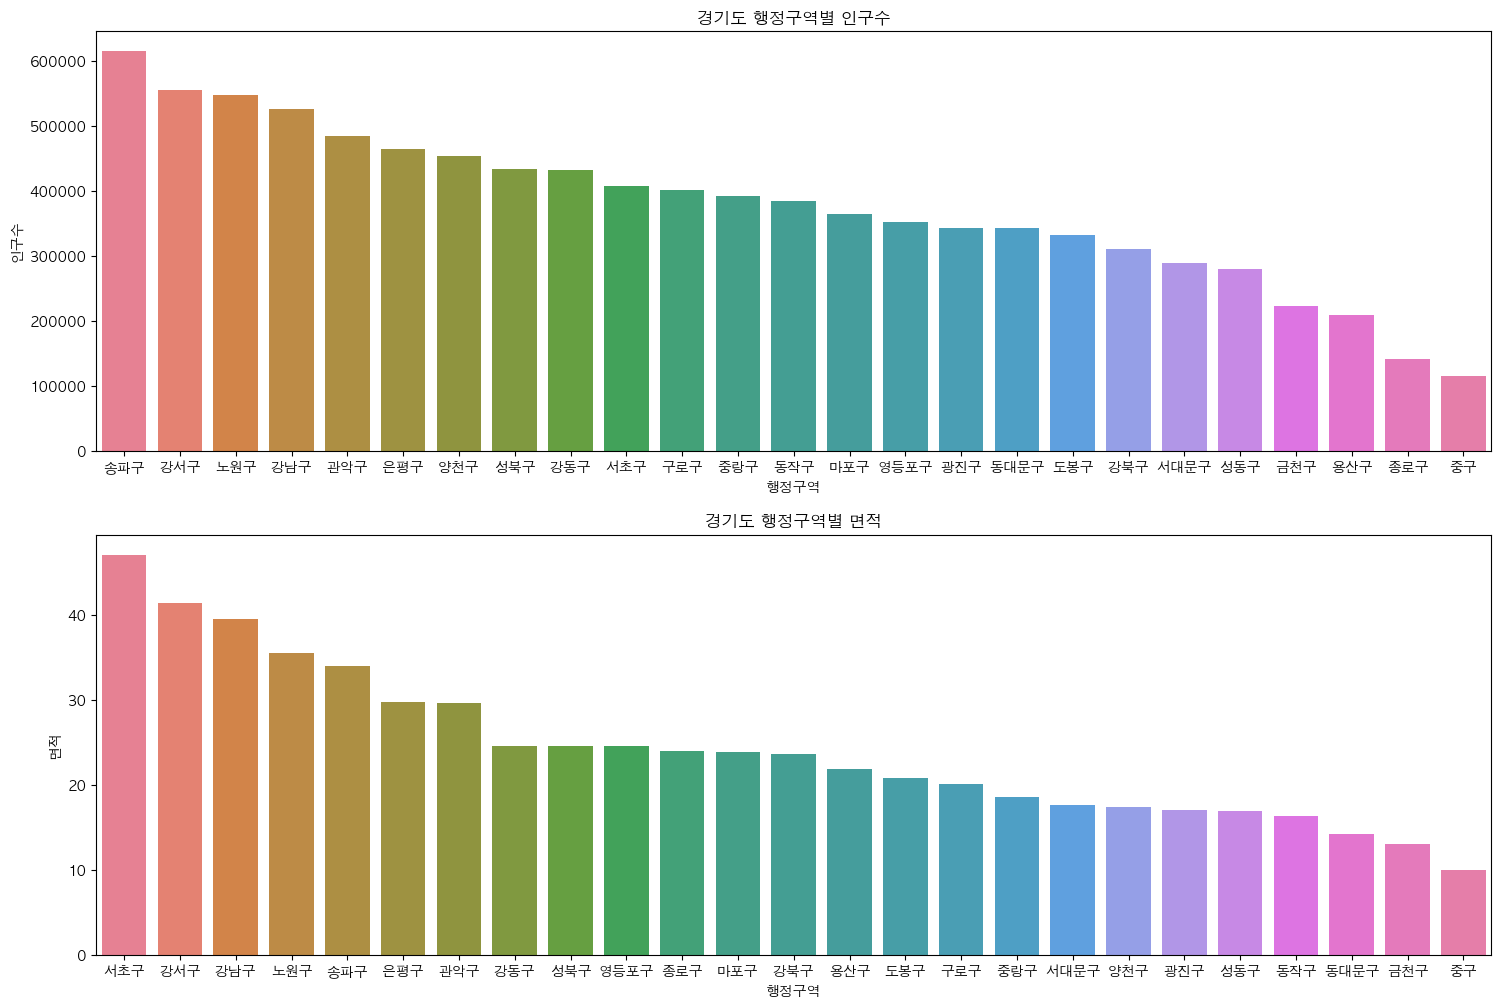

In [47]:
show_pop_area('경기도')

<Axes: xlabel='광역시도', ylabel='인구수'>

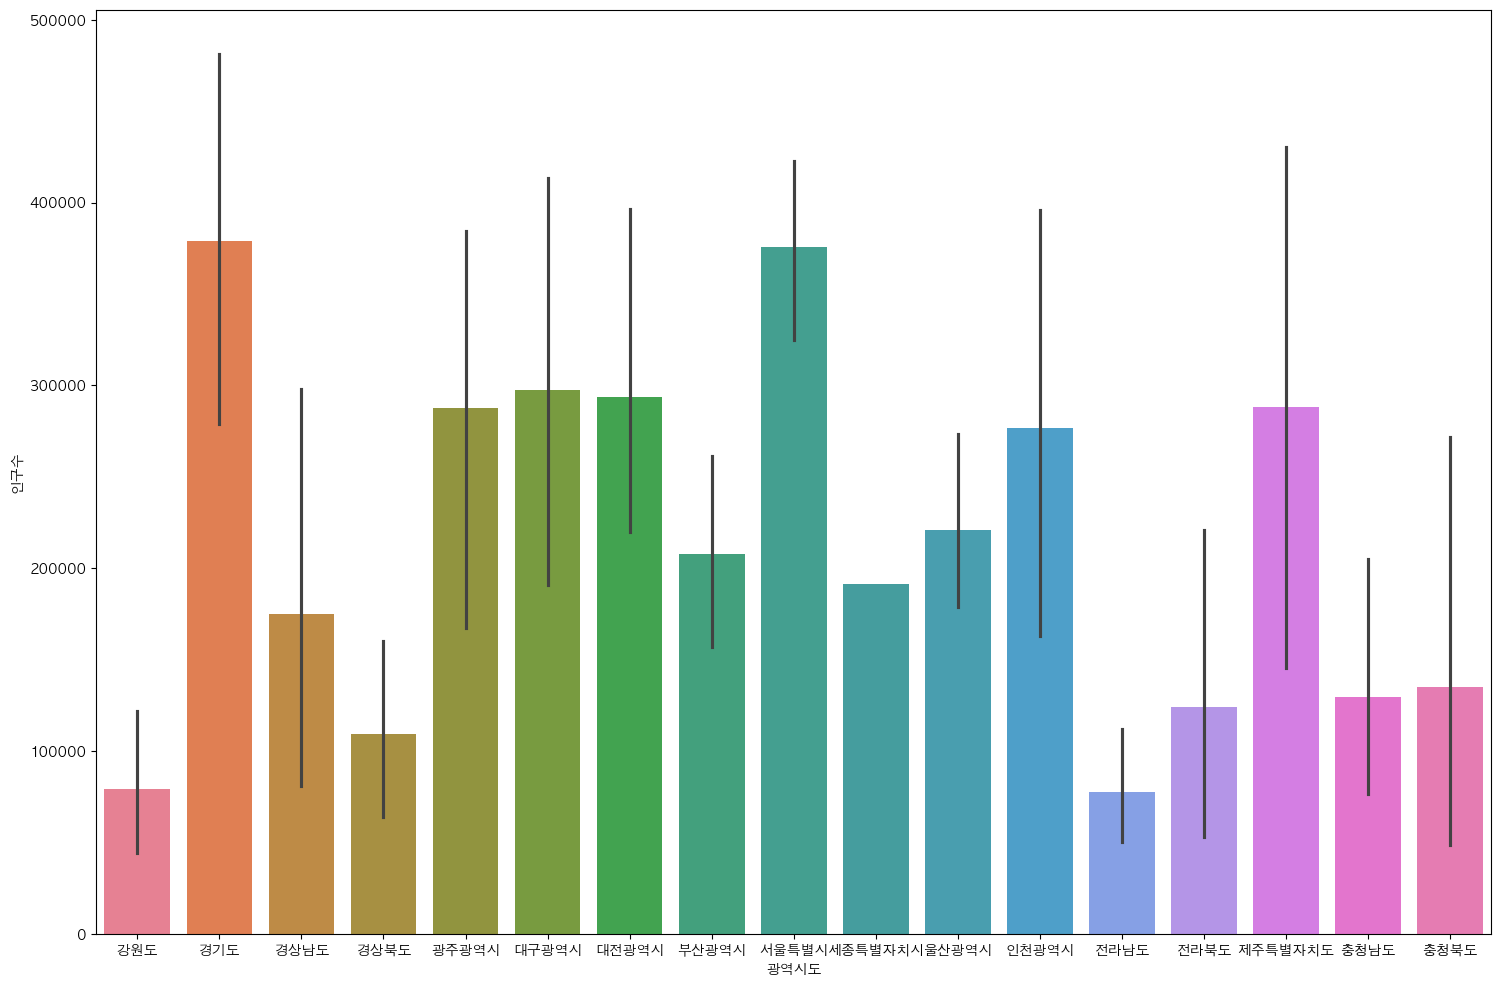

In [49]:
#전국 데이터의 광역시도별 인구수
figure, axes1 = plt.subplots()
figure.set_size_inches(18,12)
sns.barplot(data=data, x="광역시도", y="인구수", ax=axes1, hue="광역시도")

In [51]:
# plot을 image 파일로 저장하기
figure.savefig('data/전국인구수.png', bbox_inches='tight')
figure.savefig('data/전국인구수2.png')

In [54]:
print(type(seoul_df['인구수'].items()))
# zip 객체는 Iterable 하지 않기 때문에 for 문을 돌려야한다.
seoul_df['인구수'].items()

<class 'zip'>


In [58]:
for v in seoul_df['인구수'].items():
    print(type(v),v[1])

<class 'tuple'> 526157
<class 'tuple'> 432028
<class 'tuple'> 310292
<class 'tuple'> 554709
<class 'tuple'> 484478
<class 'tuple'> 342909
<class 'tuple'> 401233
<class 'tuple'> 222566
<class 'tuple'> 547202
<class 'tuple'> 331682
<class 'tuple'> 342429
<class 'tuple'> 383917
<class 'tuple'> 364232
<class 'tuple'> 288543
<class 'tuple'> 407416
<class 'tuple'> 279939
<class 'tuple'> 434061
<class 'tuple'> 615487
<class 'tuple'> 453634
<class 'tuple'> 351837
<class 'tuple'> 208603
<class 'tuple'> 464236
<class 'tuple'> 140595
<class 'tuple'> 114967
<class 'tuple'> 391655


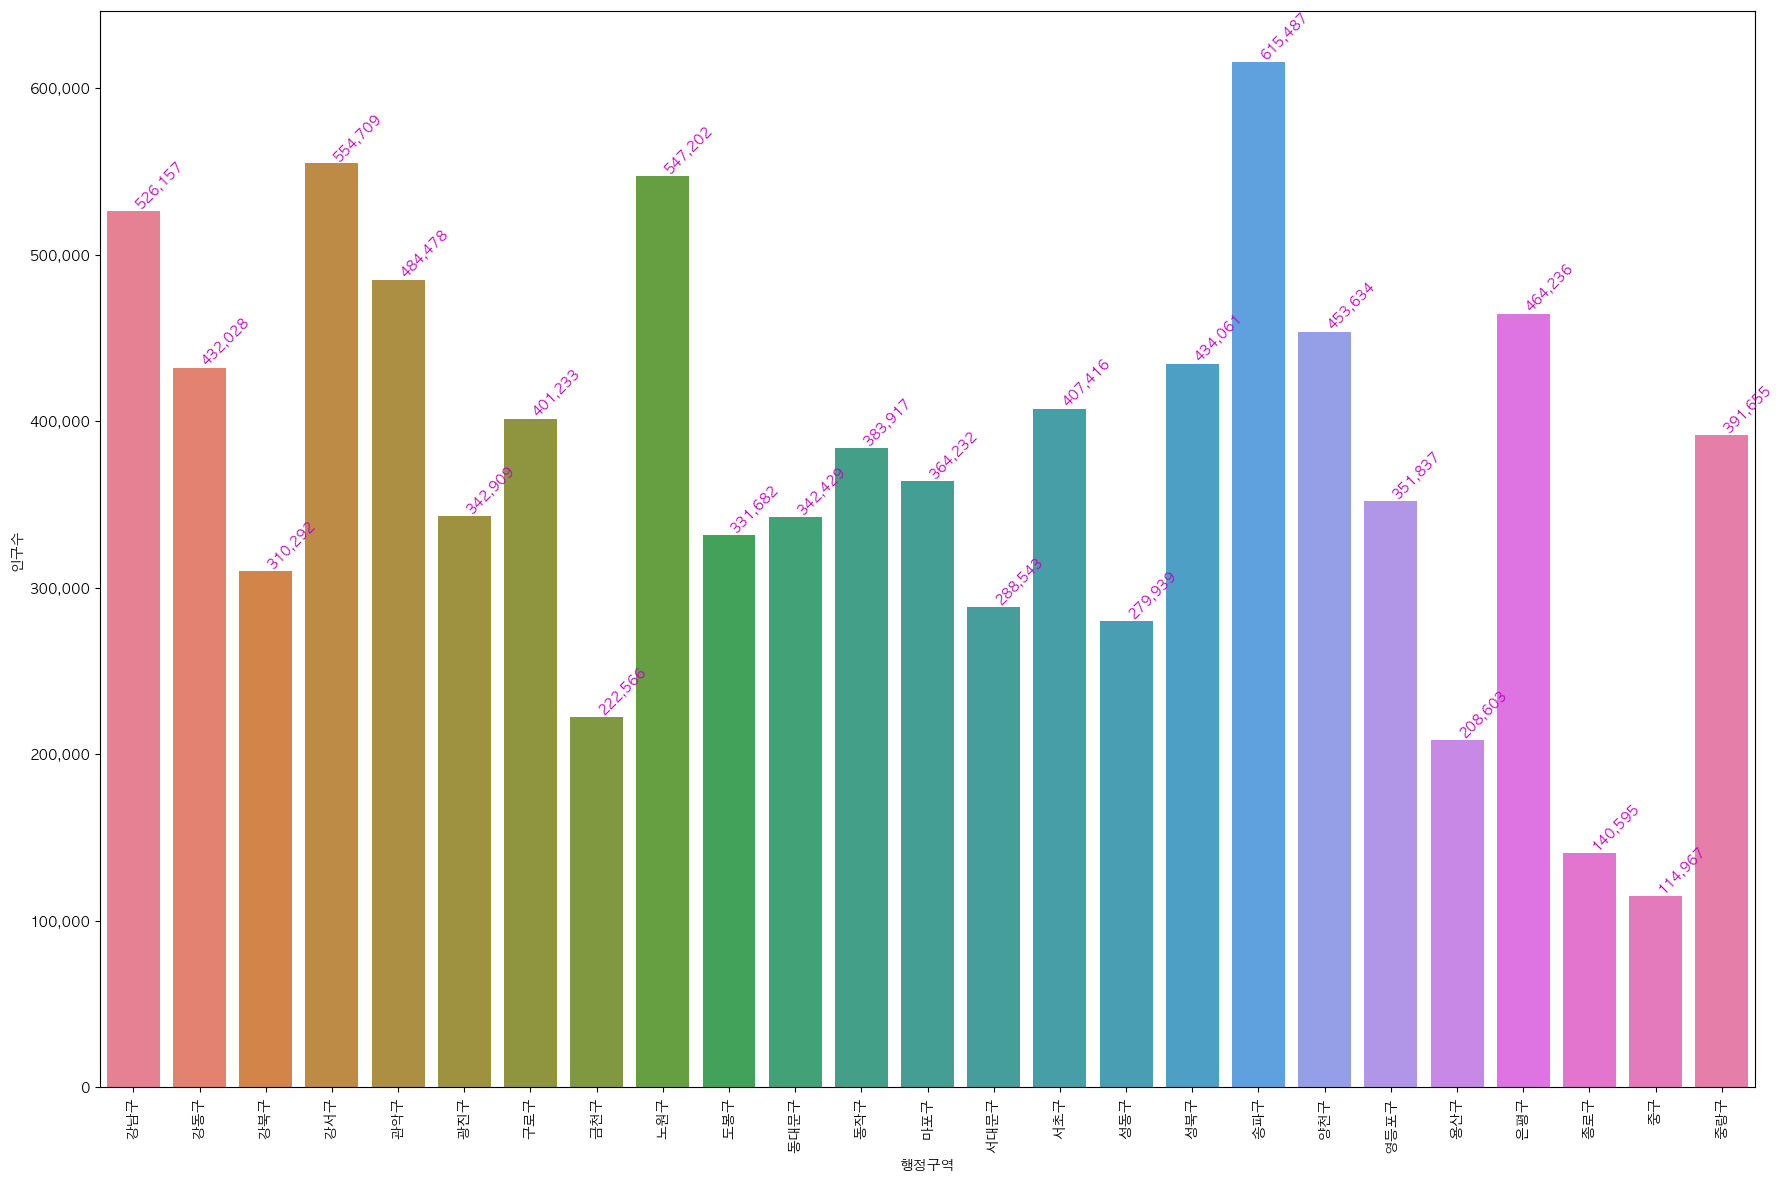

In [60]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')
#y축의 label값에 ,(콤마) 출력하기
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax1.set(ylabel='인구수')

for item in ax1.get_xticklabels(): 
    item.set_rotation(90)
for i, v in enumerate(seoul_df["인구수"].items()):
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()